In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
import warnings

In [2]:
data = pd.read_csv('abalone_dataset.csv')
data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,M,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,I,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,I,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,M,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,I,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1


In [3]:
print(data.shape)
print(data.columns)

(3132, 9)
Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'type'],
      dtype='object')


In [4]:
data.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
type                int64
dtype: object

A feature 'sex' eh do tipo caractere. Precisamos converter os dados dessa coluna para o tipo int

In [5]:
def conv(sex):
    if sex == 'M':
        sex = 0
    elif sex == 'F':
        sex = 1
    else:
        sex = 2
        
    return sex

In [6]:
data['sex'] = data['sex'].apply(conv)
data.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,type
0,0,0.535,0.420,0.150,0.6995,0.2575,0.1530,0.2400,3
1,2,0.510,0.380,0.115,0.5155,0.2150,0.1135,0.1660,1
2,2,0.185,0.130,0.045,0.0290,0.0120,0.0075,0.0095,1
3,0,0.550,0.450,0.170,0.8100,0.3170,0.1570,0.2200,3
4,2,0.535,0.415,0.150,0.5765,0.3595,0.1350,0.2250,1
5,1,0.700,0.575,0.205,1.7730,0.6050,0.4470,0.5380,3
6,0,0.400,0.305,0.085,0.2970,0.1080,0.0705,0.1000,2
7,1,0.620,0.480,0.165,1.0125,0.5325,0.4365,0.3240,2
8,0,0.655,0.515,0.200,1.3730,0.4430,0.3375,0.4900,3
9,1,0.595,0.475,0.165,1.1480,0.4440,0.2140,0.3700,2


In [7]:
data.dtypes

sex                 int64
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
type                int64
dtype: object

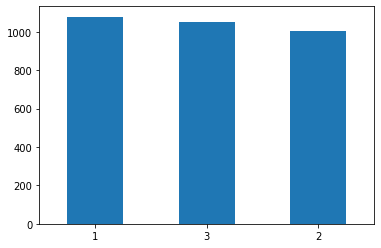

In [20]:
count_classes = pd.value_counts(data['type'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

In [21]:
features = data.columns.difference(['type'])
X = data[features].values
y = data['type'].values

In [22]:
classifier_decision_tree = DecisionTreeClassifier(random_state=2019, criterion='entropy', max_depth=5)

In [23]:
classifier_decision_tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=2019, splitter='best')

In [26]:
samples = pd.read_csv('abalone_app.csv')
samples['sex'] = samples['sex'].apply(conv)
samples.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0,0.600,0.480,0.175,1.2290,0.4125,0.2735,0.4150
1,1,0.545,0.385,0.150,1.1185,0.5425,0.2445,0.2845
2,1,0.645,0.520,0.180,1.2850,0.5775,0.3520,0.3170
3,0,0.640,0.510,0.170,1.3715,0.5670,0.3070,0.4090
4,1,0.655,0.540,0.215,1.5555,0.6950,0.2960,0.4440


In [27]:
sample_values = samples.values
sample_values

array([[0.    , 0.6   , 0.48  , ..., 0.4125, 0.2735, 0.415 ],
       [1.    , 0.545 , 0.385 , ..., 0.5425, 0.2445, 0.2845],
       [1.    , 0.645 , 0.52  , ..., 0.5775, 0.352 , 0.317 ],
       ...,
       [1.    , 0.5   , 0.405 , ..., 0.253 , 0.126 , 0.185 ],
       [2.    , 0.38  , 0.275 , ..., 0.106 , 0.0485, 0.21  ],
       [0.    , 0.59  , 0.475 , ..., 0.4545, 0.244 , 0.3095]])

In [29]:
output = classifier_decision_tree.predict(sample_values)

In [32]:
for x in output:
    print(x, end=' ')

3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

In [35]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier_decision_tree, X, y, scoring='accuracy', cv=5)
print(scores.mean())

0.6334381901482137
